### Preparing the IMDB data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [5]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s - loss: 0.6688 - acc: 0.5777 - val_loss: 0.6327 - val_acc: 0.6262
Epoch 2/10
20000/20000 [==============================] - 14s - loss: 0.4644 - acc: 0.7897 - val_loss: 0.4653 - val_acc: 0.7914
Epoch 3/10
20000/20000 [==============================] - 14s - loss: 0.3292 - acc: 0.8646 - val_loss: 0.4184 - val_acc: 0.8262
Epoch 4/10
20000/20000 [==============================] - 14s - loss: 0.2396 - acc: 0.9055 - val_loss: 0.3894 - val_acc: 0.8386
Epoch 5/10
20000/20000 [==============================] - 14s - loss: 0.1698 - acc: 0.9385 - val_loss: 0.4986 - val_acc: 0.7732
Epoch 6/10
20000/20000 [==============================] - 15s - loss: 0.1113 - acc: 0.9619 - val_loss: 0.5772 - val_acc: 0.7806
Epoch 7/10
20000/20000 [==============================] - 15s - loss: 0.0651 - acc: 0.9800 - val_loss: 0.5725 - val_acc: 0.8002
Epoch 8/10
20000/20000 [==============================]

### Plotting results

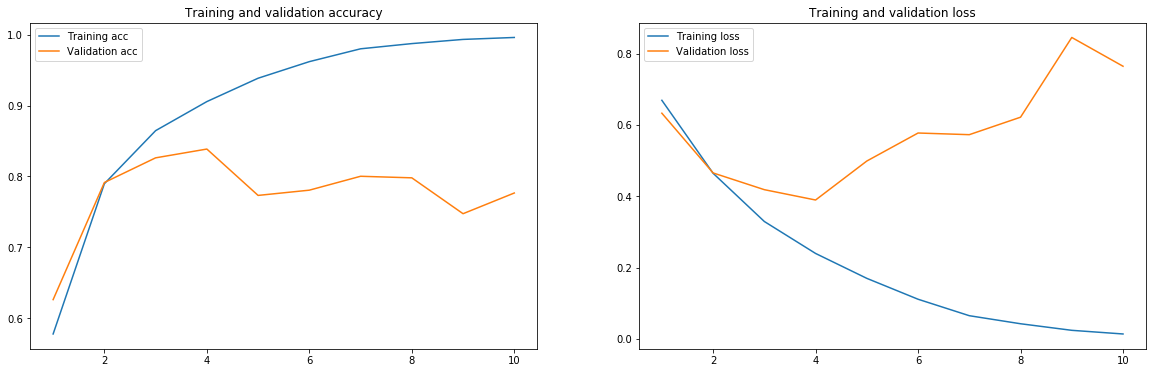

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()